In [548]:
import pandas as pd
import math
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [549]:
db = pd.read_csv('/Users/tanchik/Downloads/airlines.csv')

In [550]:
db

,flight_id,flight_no,departure_airport,arrival_airport,scheduled_departure,month_departure,city,latitude,longitude,model,all_seats,people_on_flight,kg_per_min,travel_time_min,kg_fuel,money_spent_fuel,income,profit
0,136119,PG0252,AAQ,SVO,2017-01-03T10:05:00Z,1.0,Moscow,55.972599,37.414600,Boeing 737-300,130,113.0,43,100.0,4300.0,198660.0,1653000.0,1454340.0
1,136120,PG0252,AAQ,SVO,2017-02-24T10:05:00Z,2.0,Moscow,55.972599,37.414600,Boeing 737-300,130,109.0,43,100.0,4300.0,198660.0,1605400.0,1406740.0
2,136122,PG0252,AAQ,SVO,2017-01-08T10:05:00Z,1.0,Moscow,55.972599,37.414600,Boeing 737-300,130,97.0,43,100.0,4300.0,198660.0,1431000.0,1232340.0
3,136130,PG0252,AAQ,SVO,2017-02-13T10:05:00Z,2.0,Moscow,55.972599,37.414600,Boeing 737-300,130,107.0,43,100.0,4300.0,198660.0,1556600.0,1357940.0
4,136131,PG0252,AAQ,SVO,2017-01-28T10:05:00Z,1.0,Moscow,55.972599,37.414600,Boeing 737-300,130,124.0,43,100.0,4300.0,198660.0,1812800.0,1614140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136544,PG0194,AAQ,NOZ,2017-01-31T06:10:00Z,1.0,Novokuznetsk,53.811401,86.877197,Boeing 737-300,130,NaN,43,305.0,13115.0,605913.0,NaN,NaN
123,136511,PG0194,AAQ,NOZ,2017-02-21T06:10:00Z,2.0,Novokuznetsk,53.811401,86.877197,Boeing 737-300,130,NaN,43,305.0,13115.0,605913.0,NaN,NaN
124,136540,PG0194,AAQ,NOZ,2017-01-17T06:10:00Z,1.0,Novokuznetsk,53.811401,86.877197,Boeing 737-300,130,NaN,43,305.0,13115.0,605913.0,NaN,NaN
125,136546,PG0194,AAQ,NOZ,2017-01-03T06:10:00Z,1.0,Novokuznetsk,53.811401,86.877197,Boeing 737-300,130,NaN,43,305.0,13115.0,605913.0,NaN,NaN


Добавим новые признаки: расстояние;
                        скорость;
                        коэффициент эффектинвости;
                        большие или меньше среднего дохода;
                        средняя температура зимой в городе;

In [551]:
# функция, высчитывающая расстояние от одной точки до другой 

def get_distance(x):
    departure_latitude = 45
    departure_longitude = 37.35
    r = 6371 # средний радиус земного шара
    lat1 = departure_latitude * math.pi / 180
    lat2 = x['latitude'] * math.pi / 180
    long1 = departure_longitude * math.pi / 180
    long2 = x['longitude'] * math.pi / 180
    
    cos_d = math.sin(lat1) * math.sin(lat2) + math.cos(lat1)  *math.cos(lat2) * math.cos(long2 - long1)
    d = math.acos(cos_d)
    distance = r * d
    return distance  

In [552]:
db['distance'] = db.apply(lambda x: get_distance(x), axis=1)

In [553]:
# функция вычисления скорости

def get_speed(x):
    return x['distance'] / x['travel_time_min']

In [554]:
db['speed'] = db.apply(lambda x: get_speed(x), axis=1) # км/мин

In [555]:
# функция вычисления коэффициента эффективности

def get_efficiency_ratio(x):
    return x['kg_per_min']/x['people_on_flight'] * x['speed'] # коэффициент топливной эффективности, показывающий затраты топлива в граммах на один пассажиро-километр

In [556]:
db['efficiency_ratio'] = db.apply(lambda x: get_efficiency_ratio(x), axis=1)

In [557]:
# функция, показывающая бльше ли доход каждого рейса относительно среднего

def is_more_than_avg_profit(x):
    avg_profit = db['profit'].mean()
    return x['profit'] > avg_profit

In [558]:
db['is_more_than_avg_profit'] = db.apply(lambda x: is_more_than_avg_profit(x), axis=1)

In [559]:
db['city'].unique()

array(['Moscow', 'Belgorod', 'Novokuznetsk'], dtype=object)

In [560]:
db

,flight_id,flight_no,departure_airport,arrival_airport,scheduled_departure,month_departure,city,latitude,longitude,model,...,kg_per_min,travel_time_min,kg_fuel,money_spent_fuel,income,profit,distance,speed,efficiency_ratio,is_more_than_avg_profit
0,136119,PG0252,AAQ,SVO,2017-01-03T10:05:00Z,1.0,Moscow,55.972599,37.414600,Boeing 737-300,...,43,100.0,4300.0,198660.0,1653000.0,1454340.0,1220.105759,12.201058,4.642880,True
1,136120,PG0252,AAQ,SVO,2017-02-24T10:05:00Z,2.0,Moscow,55.972599,37.414600,Boeing 737-300,...,43,100.0,4300.0,198660.0,1605400.0,1406740.0,1220.105759,12.201058,4.813261,True
2,136122,PG0252,AAQ,SVO,2017-01-08T10:05:00Z,1.0,Moscow,55.972599,37.414600,Boeing 737-300,...,43,100.0,4300.0,198660.0,1431000.0,1232340.0,1220.105759,12.201058,5.408716,True
3,136130,PG0252,AAQ,SVO,2017-02-13T10:05:00Z,2.0,Moscow,55.972599,37.414600,Boeing 737-300,...,43,100.0,4300.0,198660.0,1556600.0,1357940.0,1220.105759,12.201058,4.903229,True
4,136131,PG0252,AAQ,SVO,2017-01-28T10:05:00Z,1.0,Moscow,55.972599,37.414600,Boeing 737-300,...,43,100.0,4300.0,198660.0,1812800.0,1614140.0,1220.105759,12.201058,4.231012,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136544,PG0194,AAQ,NOZ,2017-01-31T06:10:00Z,1.0,Novokuznetsk,53.811401,86.877197,Boeing 737-300,...,43,305.0,13115.0,605913.0,NaN,NaN,3633.971344,11.914660,NaN,False
123,136511,PG0194,AAQ,NOZ,2017-02-21T06:10:00Z,2.0,Novokuznetsk,53.811401,86.877197,Boeing 737-300,...,43,305.0,13115.0,605913.0,NaN,NaN,3633.971344,11.914660,NaN,False
124,136540,PG0194,AAQ,NOZ,2017-01-17T06:10:00Z,1.0,Novokuznetsk,53.811401,86.877197,Boeing 737-300,...,43,305.0,13115.0,605913.0,NaN,NaN,3633.971344,11.914660,NaN,False
125,136546,PG0194,AAQ,NOZ,2017-01-03T06:10:00Z,1.0,Novokuznetsk,53.811401,86.877197,Boeing 737-300,...,43,305.0,13115.0,605913.0,NaN,NaN,3633.971344,11.914660,NaN,False


In [561]:
db['month_departure'] = db['month_departure'].apply(lambda x: 'December' if x == 12.0 else 'January' if x == 2.0 else 'February')

In [562]:
db.drop('latitude', axis=1, inplace=True)

In [563]:
db.drop('longitude', axis=1, inplace=True)

In [564]:
type(db['scheduled_departure'].loc[0])

str

In [565]:
db['day_of_week'] = db['scheduled_departure'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d').weekday())

In [566]:
def get_day_of_week(x):
    if x == 0:
        return 'Monday'
    elif x == 1:
        return 'Tuesday'
    elif x == 2:
        return 'Wednesday'
    elif x == 3:
        return 'Thursday'
    elif x == 4:
        return 'Friday'
    elif x == 5:
        return 'Saturday'
    elif x == 6:
        return 'Sunday'

In [567]:
db['day_of_week'] = db['day_of_week'].apply(lambda x: get_day_of_week(x))

In [568]:
db['scheduled_departure'] = db['scheduled_departure'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z"))

In [569]:
def get_aircraft_fill_percentage(x):
    return x['people_on_flight']/x['all_seats'] * 100

In [570]:
db['aircraft_fill_percentage'] = db.apply(lambda x: get_aircraft_fill_percentage(x), axis = 1)

In [571]:
def get_price_per_passenger(x):
    return x['income']/x['people_on_flight']

In [572]:
db['price_per_passenger'] = db.apply(lambda x: get_price_per_passenger(x), axis = 1)

In [646]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   flight_id                 127 non-null    int64              
 1   flight_no                 127 non-null    object             
 2   departure_airport         127 non-null    object             
 3   arrival_airport           127 non-null    object             
 4   scheduled_departure       127 non-null    datetime64[ns, UTC]
 5   month_departure           127 non-null    object             
 6   city                      127 non-null    object             
 7   model                     127 non-null    object             
 8   all_seats                 127 non-null    int64              
 9   people_on_flight          118 non-null    float64            
 10  kg_per_min                127 non-null    int64              
 11  travel_time_min    

### визуализация данных

In [573]:
db_Moscow = db[db['city'] == 'Moscow']

In [574]:
x2 = db_Moscow['flight_id'].unique()
y2 = [db_Moscow['profit'].mean() for i in range(len(db_Moscow['flight_id'].unique()))]

Text(0, 0.5, 'profit')

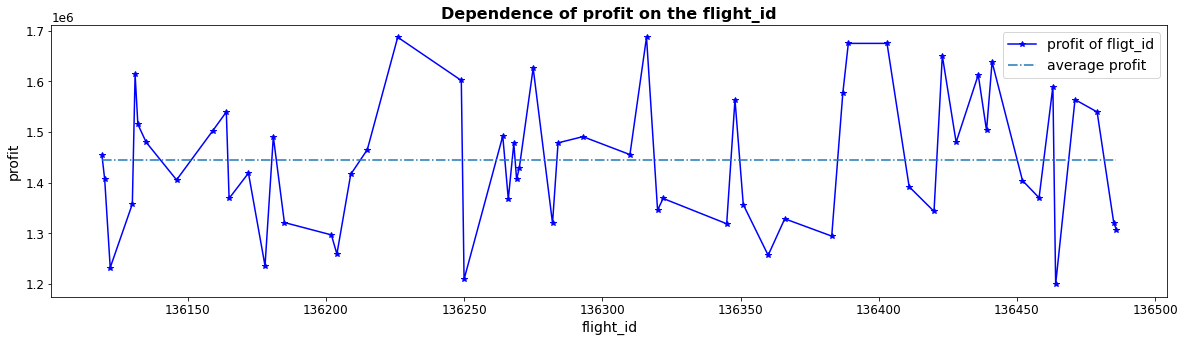

In [575]:
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot()
ax1.plot(db_Moscow['flight_id'], db_Moscow['profit'], color = 'blue', linestyle = '-', marker='*')
ax1.plot(x2, y2, linestyle = '-.')
ax1.legend(['profit of fligt_id', 'average profit'], fontsize=14)
ax1.set_title('Dependence of profit on the flight_id', fontsize = 16, weight = 'bold')
ax1.set_xlabel('flight_id', fontsize = 14)
ax1.set_ylabel('profit', fontsize = 14)

Построили график зависимости прибыли от flight_id, нанесли на график линию, показывающую среднюю прибыль. Вдальнейшем можно анализировать все, что ниже этой линии, чтобы найти 2-3 менее прибыльных рейса.

Text(0, 0.5, 'price_per_passenger')

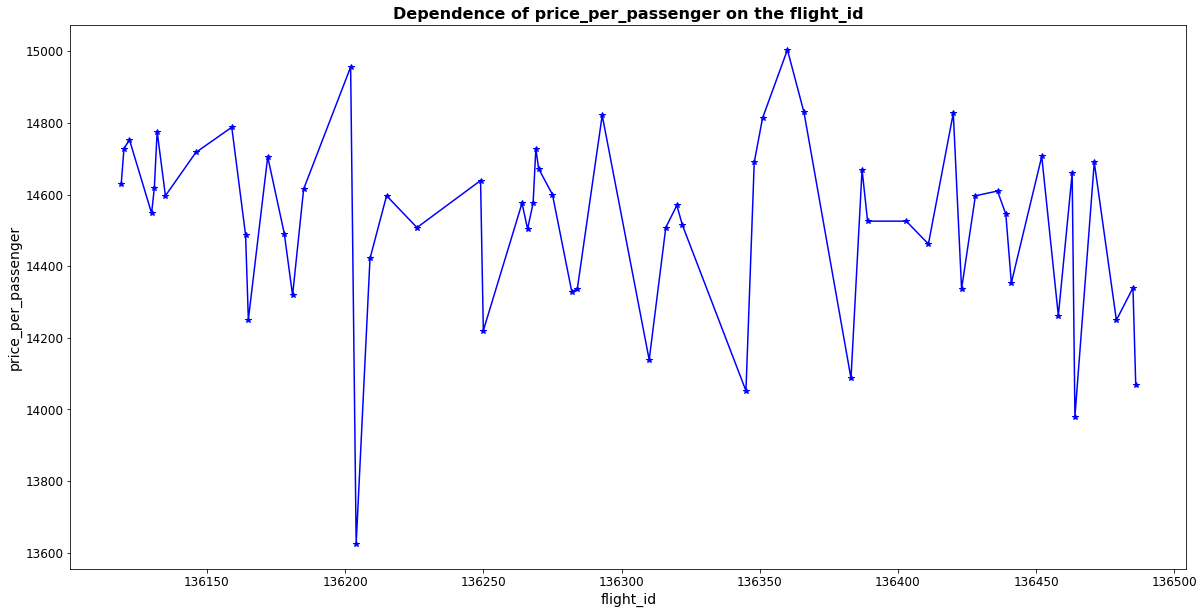

In [576]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(db_Moscow['flight_id'], db_Moscow['price_per_passenger'], color = 'blue', linestyle = '-', marker='*')
ax.set_title('Dependence of price_per_passenger on the flight_id', fontsize = 16, weight = 'bold')
ax.set_xlabel('flight_id', fontsize = 14)
ax.set_ylabel('price_per_passenger', fontsize = 14)

Так как более тяжелый самоелте расходует больше топлива, то логичнобудет посчитать доход от одного пассажира на каждом рейсе. Отобразим это на графике зависимости дохода с одного пассажира от flight_id 

In [615]:
def is_more_than_avg_profit_Moscow(x):
    avg_profit = db_Moscow.profit.mean()
    return x['profit'] > avg_profit

In [616]:
db_Moscow['is_more_than_avg_profit'] = db_Moscow.apply(lambda x: is_more_than_avg_profit_Moscow(x), axis = 1)

<ipython-input-616-8e7596dd71c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_Moscow['is_more_than_avg_profit'] = db_Moscow.apply(lambda x: is_more_than_avg_profit_Moscow(x), axis = 1)


Text(0, 0.5, 'profit')

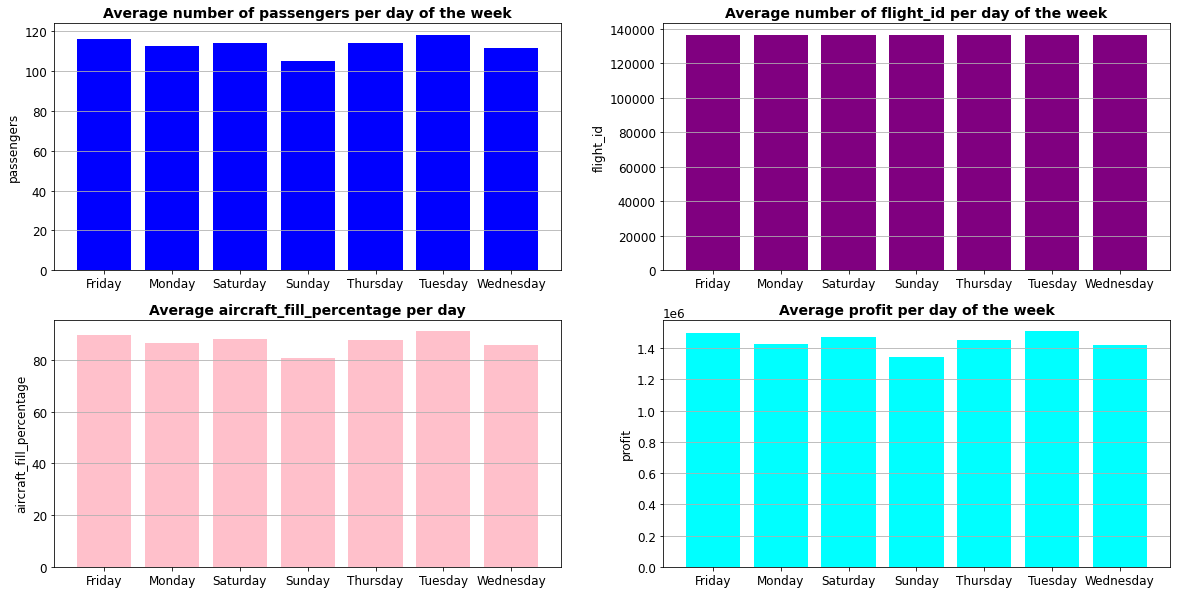

In [617]:
fig2 = plt.figure(figsize=(20,10))
ax1 = fig2.add_subplot(2,2,1)
ax1.bar(db_Moscow.groupby(by = ['day_of_week']).people_on_flight.mean().index, db_Moscow.groupby(by = ['day_of_week']).people_on_flight.mean().values, color = 'blue')
ax1.yaxis.grid(True)
ax1.set_title('Average number of passengers per day of the week', fontsize = 14, weight = 'bold')
ax1.set_ylabel('passengers')

ax2 = fig2.add_subplot(2,2,2)
ax2.bar(db_Moscow.groupby(by = ['day_of_week']).flight_id.mean().index, db_Moscow.groupby(by = ['day_of_week']).flight_id.mean().values, color = 'purple')
ax2.yaxis.grid(True)
ax2.set_title('Average number of flight_id per day of the week', fontsize = 14, weight = 'bold')
ax2.set_ylabel('flight_id')

ax3 = fig2.add_subplot(2,2,3)
ax3.bar(db_Moscow.groupby(by = ['day_of_week']).aircraft_fill_percentage.mean().index, db_Moscow.groupby(by = ['day_of_week']).aircraft_fill_percentage.mean().values, color = 'pink')
ax3.yaxis.grid(True)
ax3.set_title('Average aircraft_fill_percentage per day', fontsize = 14, weight = 'bold')
ax3.set_ylabel('aircraft_fill_percentage')

ax4 = fig2.add_subplot(2,2,4)
ax4.bar(db_Moscow.groupby(by = ['day_of_week']).profit.mean().index, db_Moscow.groupby(by = ['day_of_week']).profit.mean().values, color = 'cyan')
ax4.yaxis.grid(True)
ax4.set_title('Average profit per day of the week', fontsize = 14, weight = 'bold')
ax4.set_ylabel('profit')

Мы видимо, что во все дни недели совершается почти одинаковое количсетво полетов, однако мы можем наблюдать различное количество пассожиров на борту. Мы видим, что в воскресенье процент заполняемости самоелета много меньше чем во вторник или пятницу. Исходя из этого можно проанализировать наименее популярные дни. 

In [635]:
db_Moscow.groupby(by = ['day_of_week']).is_more_than_avg_profit.sum().sort_values(ascending=False)

day_of_week
Tuesday      8
Saturday     5
Friday       4
Thursday     4
Wednesday    4
Monday       3
Sunday       1
Name: is_more_than_avg_profit, dtype: int64

Более эффективные дни по количеству пассажиров имею и большее количсетво прибыли выше средней. Выделим только те flight_id, прибыль которых ниже средней

In [619]:
less_valuable_flights_Moscow = db_Moscow[db_Moscow['profit'] < db_Moscow['profit'].mean()]
print(f'Количество полетов, прибыль которых ниже средней: {most_valuable_flights_Moscow.shape}')
print(f"Количество полетов, прибыль которых выше средней: {db_Moscow[db_Moscow['profit'] >= db_Moscow['profit'].mean()].shape}")

Количество полетов, прибыль которых ниже средней: (30, 23)
Количество полетов, прибыль которых выше средней: (29, 23)


Построю распределение прибыли общей и прибыли, когда мы оставили толкьо 29 полетов

Text(0.5, 1.0, 'Прибыль первоначальной выборки, где средняя: 1443916')

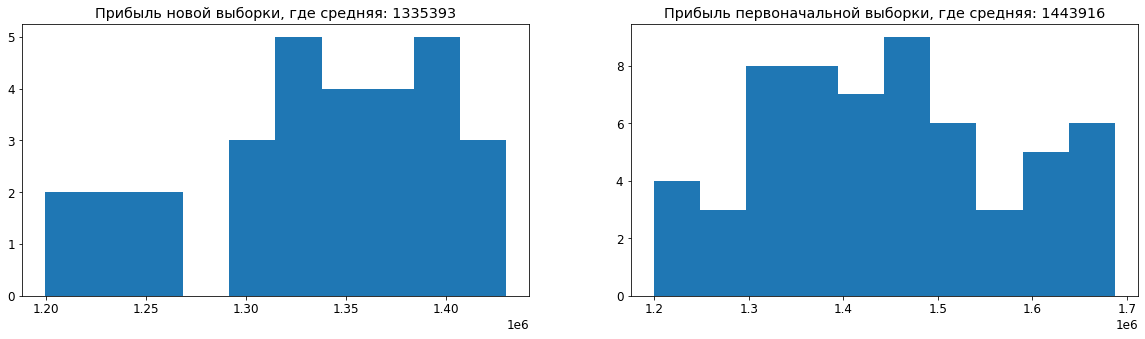

In [620]:
fig3 = plt.figure(figsize = (20,5))
ax1 = fig3.add_subplot(1,2,1)
ax1.hist(less_valuable_flights_Moscow.profit)
ax1.set_title(f'Прибыль новой выборки, где средняя: {round(most_valuable_flights_Moscow.profit.mean())}')
ax2 = fig3.add_subplot(1,2,2)
ax2.hist(db_Moscow.profit)
ax2.set_title(f'Прибыль первоначальной выборки, где средняя: {round(db_Moscow.profit.mean())}')

Построю новые графики для новой выборки 

Text(0, 0.5, 'profit')

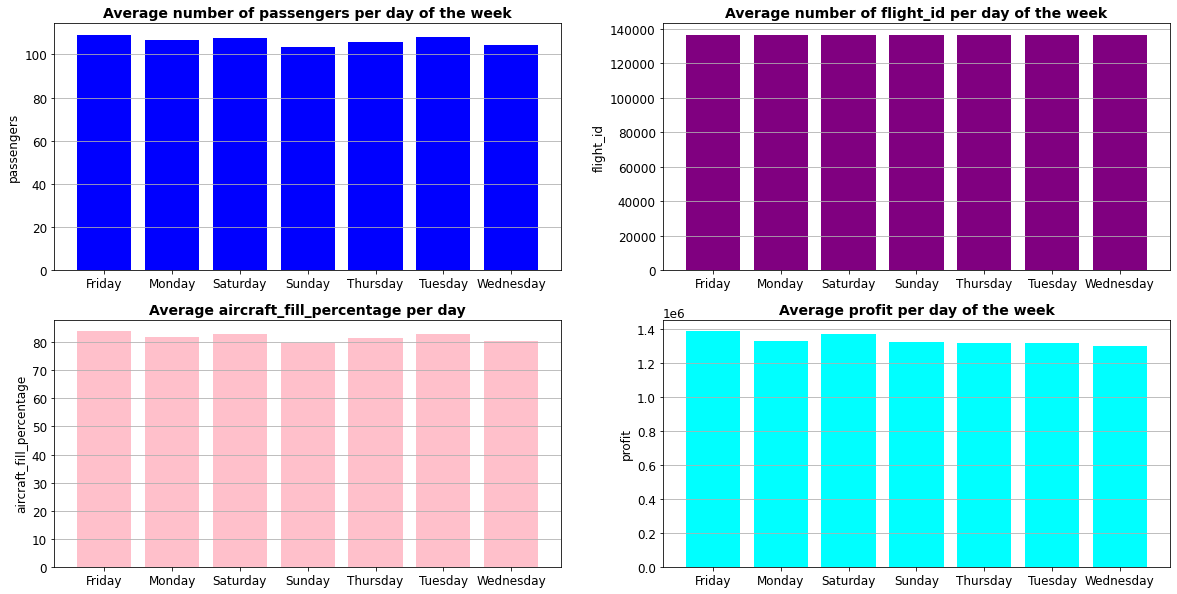

In [621]:
fig2 = plt.figure(figsize=(20,10))
ax1 = fig2.add_subplot(2,2,1)
ax1.bar(less_valuable_flights_Moscow.groupby(by = ['day_of_week']).people_on_flight.mean().index, less_valuable_flights_Moscow.groupby(by = ['day_of_week']).people_on_flight.mean().values, color = 'blue')
ax1.yaxis.grid(True)
ax1.set_title('Average number of passengers per day of the week', fontsize = 14, weight = 'bold')
ax1.set_ylabel('passengers')

ax2 = fig2.add_subplot(2,2,2)
ax2.bar(less_valuable_flights_Moscow.groupby(by = ['day_of_week']).flight_id.mean().index, less_valuable_flights_Moscow.groupby(by = ['day_of_week']).flight_id.mean().values, color = 'purple')
ax2.yaxis.grid(True)
ax2.set_title('Average number of flight_id per day of the week', fontsize = 14, weight = 'bold')
ax2.set_ylabel('flight_id')

ax3 = fig2.add_subplot(2,2,3)
ax3.bar(less_valuable_flights_Moscow.groupby(by = ['day_of_week']).aircraft_fill_percentage.mean().index, less_valuable_flights_Moscow.groupby(by = ['day_of_week']).aircraft_fill_percentage.mean().values, color = 'pink')
ax3.yaxis.grid(True)
ax3.set_title('Average aircraft_fill_percentage per day', fontsize = 14, weight = 'bold')
ax3.set_ylabel('aircraft_fill_percentage')

ax4 = fig2.add_subplot(2,2,4)
ax4.bar(less_valuable_flights_Moscow.groupby(by = ['day_of_week']).profit.mean().index, less_valuable_flights_Moscow.groupby(by = ['day_of_week']).profit.mean().values, color = 'cyan')
ax4.yaxis.grid(True)
ax4.set_title('Average profit per day of the week', fontsize = 14, weight = 'bold')
ax4.set_ylabel('profit')

In [614]:
most_valuable_flights_Moscow.sort_values(by = ['profit']).head(3)

,flight_id,flight_no,departure_airport,arrival_airport,scheduled_departure,month_departure,city,model,all_seats,people_on_flight,...,money_spent_fuel,income,profit,distance,speed,efficiency_ratio,is_more_than_avg_profit,day_of_week,aircraft_fill_percentage,price_per_passenger
54,136464,PG0252,AAQ,SVO,2017-01-09 10:05:00+00:00,February,Moscow,Boeing 737-300,130,100.0,...,198660.0,1398000.0,1199340.0,1220.105759,12.201058,5.246455,False,Monday,76.923077,13980.00000
21,136250,PG0252,AAQ,SVO,2017-02-08 10:05:00+00:00,January,Moscow,Boeing 737-300,130,99.0,...,198660.0,1407800.0,1209140.0,1220.105759,12.201058,5.299449,False,Wednesday,76.153846,14220.20202
2,136122,PG0252,AAQ,SVO,2017-01-08 10:05:00+00:00,February,Moscow,Boeing 737-300,130,97.0,...,198660.0,1431000.0,1232340.0,1220.105759,12.201058,5.408716,False,Sunday,74.615385,14752.57732


Проделав все манипуляции, можно выделить три лидирующих дня из выборник с доходом ниже среднего: пятница, суббота 
и четверг. Если мы найдем три рейса с наименьшей прибылью, то они как раз выпадут на наименее популярные по полетам дни: понедельник, среда, воскресенье.

Text(0, 0.5, 'passengers')

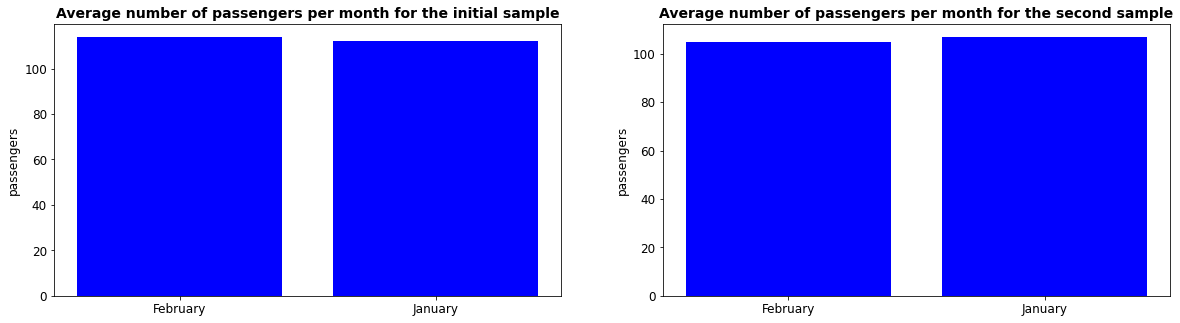

In [623]:
fig4 = plt.figure(figsize = (20,5))
ax1 = fig4.add_subplot(1,2,1)
ax1.bar(db_Moscow.groupby(by = ['month_departure']).people_on_flight.mean().index, db_Moscow.groupby(by = ['month_departure']).people_on_flight.mean().values, color='blue')
ax1.set_title('Average number of passengers per month for the initial sample', fontsize = 14, weight = 'bold')
ax1.set_ylabel('passengers')

ax2 = fig4.add_subplot(1,2,2)
ax2.bar(less_valuable_flights_Moscow.groupby(by = ['month_departure']).people_on_flight.mean().index, less_valuable_flights_Moscow.groupby(by = ['month_departure']).people_on_flight.mean().values, color='blue')
ax2.set_title('Average number of passengers per month for the second sample', fontsize = 14, weight = 'bold')
ax2.set_ylabel('passengers')

Месяц никак не влияет на количсетво людей

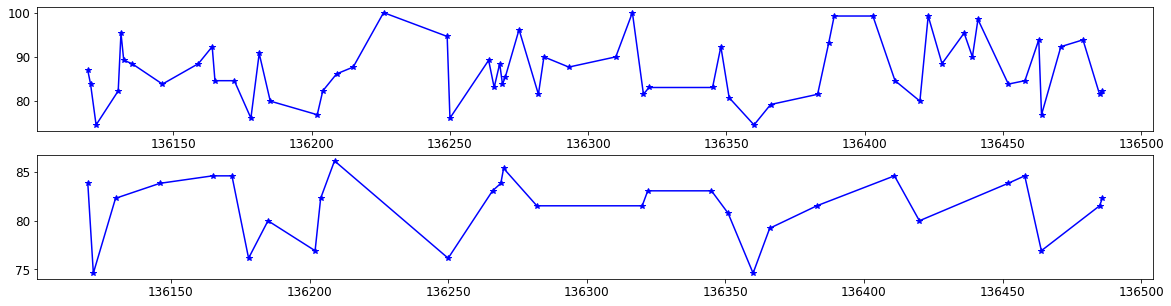

In [624]:
fig5 = plt.figure(figsize = (20,5))
ax1 = fig5.add_subplot(2,1,1)
ax1.plot(db_Moscow['flight_id'], db_Moscow['aircraft_fill_percentage'], color = 'blue', linestyle = '-', marker='*')
ax2 = fig5.add_subplot(2,1,2)
ax2.plot(less_valuable_flights_Moscow['flight_id'], less_valuable_flights_Moscow['aircraft_fill_percentage'], color = 'blue', linestyle = '-', marker='*')

Мы видим, что процент заполняемости во второй выборке меньше 85%

Один из вариантов исключения наименее прибильных рейсов:
выбрать три наименее прибыльных рейса, прибыль которых ниже средней, рейсы, отправляющиеся в наименее популярные дни, где процент заполняемости самолета меньше 80%
flight_id: 136464, 136250, 136122

Text(0, 0.5, 'price_per_passenger')

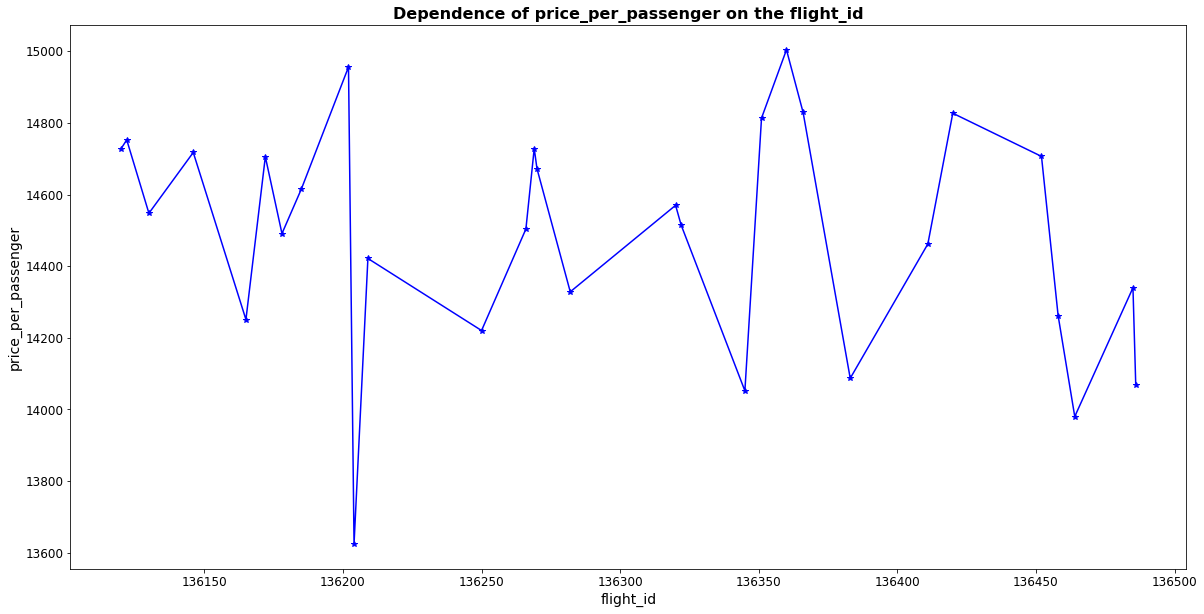

In [626]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(less_valuable_flights_Moscow['flight_id'], less_valuable_flights_Moscow['price_per_passenger'], color = 'blue', linestyle = '-', marker='*')
ax.set_title('Dependence of price_per_passenger on the flight_id', fontsize = 16, weight = 'bold')
ax.set_xlabel('flight_id', fontsize = 14)
ax.set_ylabel('price_per_passenger', fontsize = 14)

******************************************************************************************************************

In [588]:
db_Belgorod = db[db['city'] == 'Belgorod']

In [589]:
x2 = db_Belgorod['flight_id'].unique()
y2 = [db_Belgorod['profit'].mean() for i in range(len(db_Belgorod['flight_id'].unique()))]

Text(0, 0.5, 'profit')

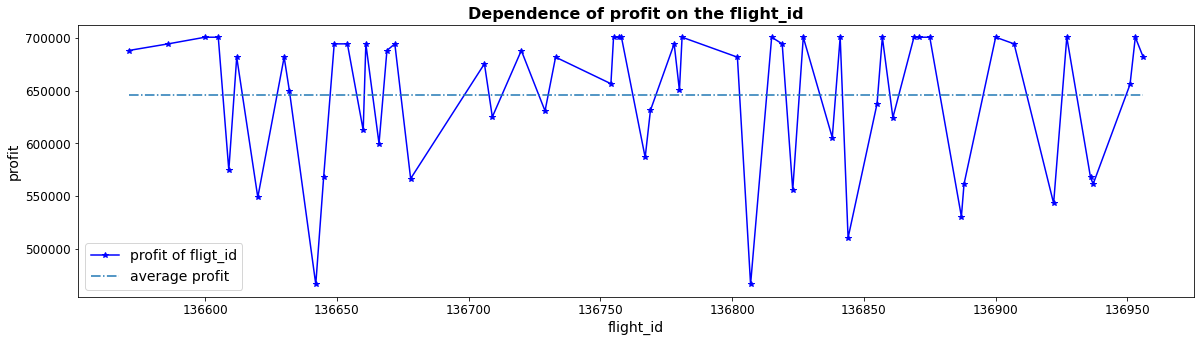

In [590]:
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot()
ax1.plot(db_Belgorod['flight_id'], db_Belgorod['profit'], color = 'blue', linestyle = '-', marker='*')
ax1.plot(x2, y2, linestyle = '-.')
ax1.legend(['profit of fligt_id', 'average profit'], fontsize=14)
ax1.set_title('Dependence of profit on the flight_id', fontsize = 16, weight = 'bold')
ax1.set_xlabel('flight_id', fontsize = 14)
ax1.set_ylabel('profit', fontsize = 14)

Text(0, 0.5, 'price_per_passenger')

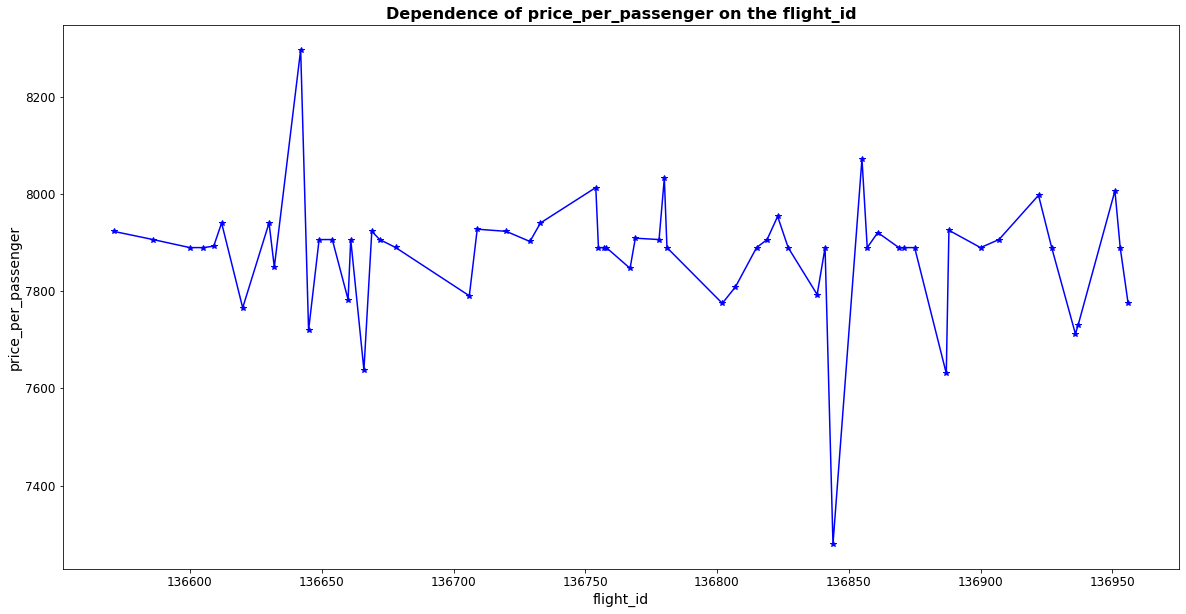

In [602]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(db_Belgorod['flight_id'], db_Belgorod['price_per_passenger'], color = 'blue', linestyle = '-', marker='*')
ax.set_title('Dependence of price_per_passenger on the flight_id', fontsize = 16, weight = 'bold')
ax.set_xlabel('flight_id', fontsize = 14)
ax.set_ylabel('price_per_passenger', fontsize = 14)

In [631]:
def is_more_than_avg_profit_Belgorod(x):
    avg_profit = db_Belgorod.profit.mean()
    return x['profit'] > avg_profit

In [636]:
db_Belgorod['is_more_than_avg_profit'] = db_Belgorod.apply(lambda x: is_more_than_avg_profit_Belgorod(x), axis = 1)

<ipython-input-636-8bb461a06360>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_Belgorod['is_more_than_avg_profit'] = db_Belgorod.apply(lambda x: is_more_than_avg_profit_Belgorod(x), axis = 1)


Text(0, 0.5, 'profit')

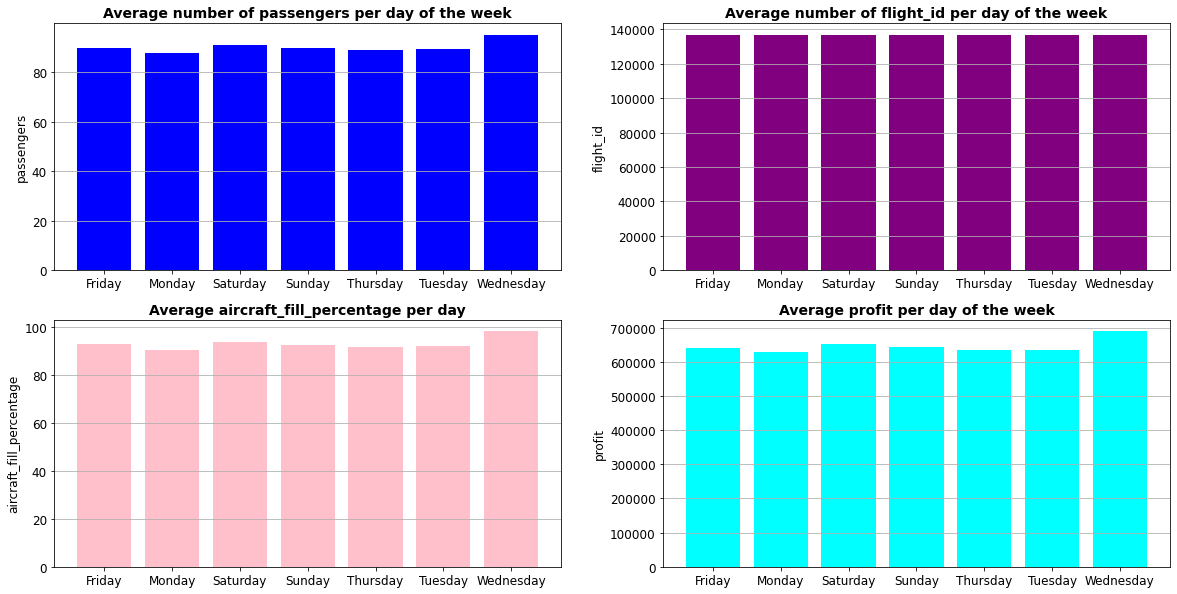

In [637]:
fig2 = plt.figure(figsize=(20,10))
ax1 = fig2.add_subplot(2,2,1)
ax1.bar(db_Belgorod.groupby(by = ['day_of_week']).people_on_flight.mean().index, db_Belgorod.groupby(by = ['day_of_week']).people_on_flight.mean().values, color = 'blue')
ax1.yaxis.grid(True)
ax1.set_title('Average number of passengers per day of the week', fontsize = 14, weight = 'bold')
ax1.set_ylabel('passengers')

ax2 = fig2.add_subplot(2,2,2)
ax2.bar(db_Belgorod.groupby(by = ['day_of_week']).flight_id.mean().index, db_Belgorod.groupby(by = ['day_of_week']).flight_id.mean().values, color = 'purple')
ax2.yaxis.grid(True)
ax2.set_title('Average number of flight_id per day of the week', fontsize = 14, weight = 'bold')
ax2.set_ylabel('flight_id')

ax3 = fig2.add_subplot(2,2,3)
ax3.bar(db_Belgorod.groupby(by = ['day_of_week']).aircraft_fill_percentage.mean().index, db_Belgorod.groupby(by = ['day_of_week']).aircraft_fill_percentage.mean().values, color = 'pink')
ax3.yaxis.grid(True)
ax3.set_title('Average aircraft_fill_percentage per day', fontsize = 14, weight = 'bold')
ax3.set_ylabel('aircraft_fill_percentage')

ax4 = fig2.add_subplot(2,2,4)
ax4.bar(db_Belgorod.groupby(by = ['day_of_week']).profit.mean().index, db_Belgorod.groupby(by = ['day_of_week']).profit.mean().values, color = 'cyan')
ax4.yaxis.grid(True)
ax4.set_title('Average profit per day of the week', fontsize = 14, weight = 'bold')
ax4.set_ylabel('profit')

Также как и с перелетами в Москву, количество перелетов в день практичеки одинаковое, однако количество перевозимых пассажиров
-> доход различны. Прибыль зависит от количесвта пассажиров, потому все графики имею одинаковую тенденцию.  

In [638]:
db_Belgorod.groupby(by = ['day_of_week']).is_more_than_avg_profit.sum().sort_values(ascending=False)

day_of_week
Wednesday    7
Saturday     6
Friday       5
Monday       5
Thursday     5
Tuesday      5
Sunday       4
Name: is_more_than_avg_profit, dtype: int64

Почти в каждый день недели одинаковое количество прибыли выше средней. Выделим только те flight_id, прибыль которых ниже средней

In [639]:
less_valuable_flights_Belgorod = db_Belgorod[db_Belgorod['profit'] < db_Belgorod['profit'].mean()]
print(f'Количество полетов, прибыль которых ниже среднего: {less_valuable_flights_Belgorod.shape}')
print(f"Количество полетов, прибыль которых выше или равна средней: {db_Belgorod[db_Belgorod['profit'] >= db_Belgorod['profit'].mean()].shape}")

Количество полетов, прибыль которых ниже среднего: (22, 23)
Количество полетов, прибыль которых выше или равна средней: (37, 23)


Построю распределение прибыли общей и прибыли, когда мы оставили толкьо 22 полетов

Text(0.5, 1.0, 'Прибыль первоначальной выборки, где средняя: 645756')

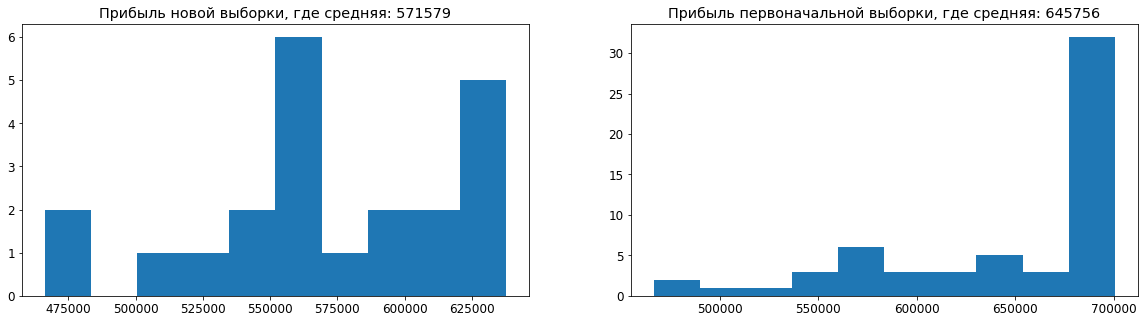

In [640]:
fig3 = plt.figure(figsize = (20,5))
ax1 = fig3.add_subplot(1,2,1)
ax1.hist(less_valuable_flights_Belgorod.profit)
ax1.set_title(f'Прибыль новой выборки, где средняя: {round(less_valuable_flights_Belgorod.profit.mean())}')
ax2 = fig3.add_subplot(1,2,2)
ax2.hist(db_Belgorod.profit)
ax2.set_title(f'Прибыль первоначальной выборки, где средняя: {round(db_Belgorod.profit.mean())}')

Построю новые графики для новой выборки

Text(0, 0.5, 'profit')

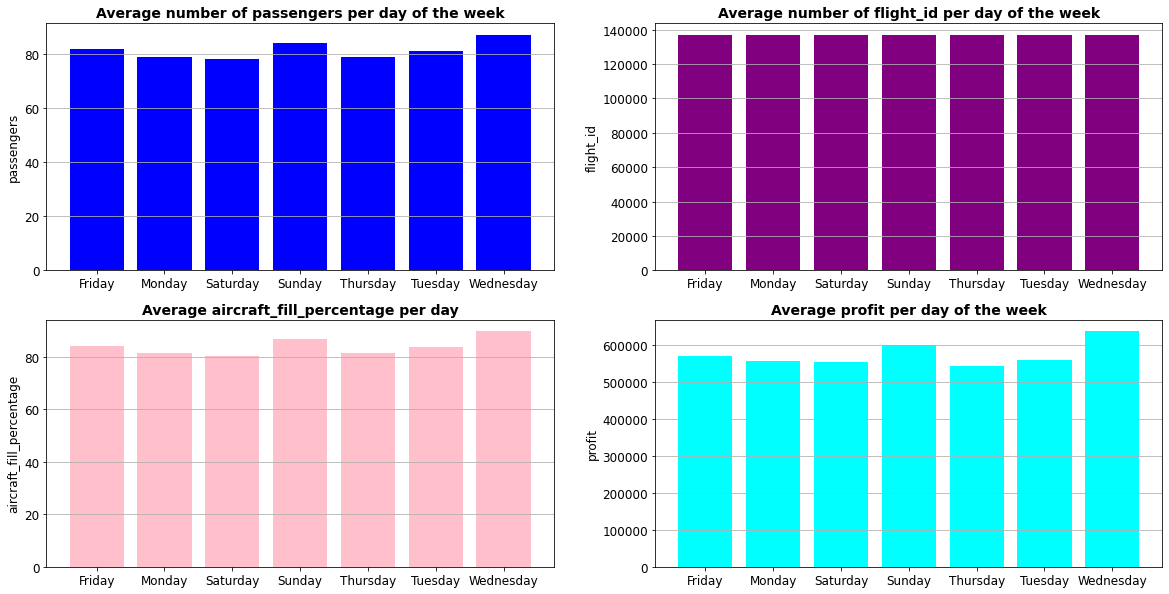

In [641]:
fig2 = plt.figure(figsize=(20,10))
ax1 = fig2.add_subplot(2,2,1)
ax1.bar(less_valuable_flights_Belgorod.groupby(by = ['day_of_week']).people_on_flight.mean().index, less_valuable_flights_Belgorod.groupby(by = ['day_of_week']).people_on_flight.mean().values, color = 'blue')
ax1.yaxis.grid(True)
ax1.set_title('Average number of passengers per day of the week', fontsize = 14, weight = 'bold')
ax1.set_ylabel('passengers')

ax2 = fig2.add_subplot(2,2,2)
ax2.bar(less_valuable_flights_Belgorod.groupby(by = ['day_of_week']).flight_id.mean().index, less_valuable_flights_Belgorod.groupby(by = ['day_of_week']).flight_id.mean().values, color = 'purple')
ax2.yaxis.grid(True)
ax2.set_title('Average number of flight_id per day of the week', fontsize = 14, weight = 'bold')
ax2.set_ylabel('flight_id')

ax3 = fig2.add_subplot(2,2,3)
ax3.bar(less_valuable_flights_Belgorod.groupby(by = ['day_of_week']).aircraft_fill_percentage.mean().index, less_valuable_flights_Belgorod.groupby(by = ['day_of_week']).aircraft_fill_percentage.mean().values, color = 'pink')
ax3.yaxis.grid(True)
ax3.set_title('Average aircraft_fill_percentage per day', fontsize = 14, weight = 'bold')
ax3.set_ylabel('aircraft_fill_percentage')

ax4 = fig2.add_subplot(2,2,4)
ax4.bar(less_valuable_flights_Belgorod.groupby(by = ['day_of_week']).profit.mean().index, less_valuable_flights_Belgorod.groupby(by = ['day_of_week']).profit.mean().values, color = 'cyan')
ax4.yaxis.grid(True)
ax4.set_title('Average profit per day of the week', fontsize = 14, weight = 'bold')
ax4.set_ylabel('profit')

В новой выборке остались полеты в которых самолет заполненные где-то на 80%.

In [645]:
less_valuable_flights_Belgorod.sort_values(by = ['profit']).head(5)

,flight_id,flight_no,departure_airport,arrival_airport,scheduled_departure,month_departure,city,model,all_seats,people_on_flight,...,money_spent_fuel,income,profit,distance,speed,efficiency_ratio,is_more_than_avg_profit,day_of_week,aircraft_fill_percentage,price_per_passenger
68,136642,PG0480,AAQ,EGO,2017-01-30 09:25:00+00:00,February,Belgorod,Sukhoi Superjet-100,97,64.0,...,64680.0,531000.0,466320.0,630.111471,12.602229,5.513475,False,Monday,65.979381,8296.875000
93,136807,PG0480,AAQ,EGO,2017-02-23 09:25:00+00:00,January,Belgorod,Sukhoi Superjet-100,97,68.0,...,64680.0,531000.0,466320.0,630.111471,12.602229,5.189153,False,Thursday,70.103093,7808.823529
100,136844,PG0480,AAQ,EGO,2017-02-28 09:25:00+00:00,January,Belgorod,Sukhoi Superjet-100,97,79.0,...,64680.0,575100.0,510420.0,630.111471,12.602229,4.466613,False,Tuesday,81.443299,7279.746835
107,136887,PG0480,AAQ,EGO,2017-01-20 09:25:00+00:00,February,Belgorod,Sukhoi Superjet-100,97,78.0,...,64680.0,595200.0,530520.0,630.111471,12.602229,4.523877,False,Friday,80.412371,7630.769231
111,136922,PG0480,AAQ,EGO,2017-02-11 09:25:00+00:00,January,Belgorod,Sukhoi Superjet-100,97,76.0,...,64680.0,607800.0,543120.0,630.111471,12.602229,4.642927,False,Saturday,78.350515,7997.368421


Text(0, 0.5, 'passengers')

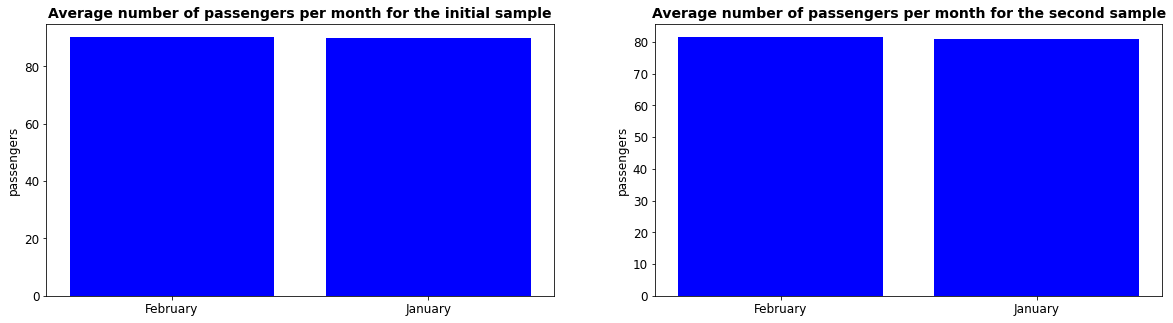

In [643]:
fig4 = plt.figure(figsize = (20,5))
ax1 = fig4.add_subplot(1,2,1)
ax1.bar(db_Belgorod.groupby(by = ['month_departure']).people_on_flight.mean().index, db_Belgorod.groupby(by = ['month_departure']).people_on_flight.mean().values, color='blue')
ax1.set_title('Average number of passengers per month for the initial sample', fontsize = 14, weight = 'bold')
ax1.set_ylabel('passengers')

ax2 = fig4.add_subplot(1,2,2)
ax2.bar(less_valuable_flights_Belgorod.groupby(by = ['month_departure']).people_on_flight.mean().index, less_valuable_flights_Belgorod.groupby(by = ['month_departure']).people_on_flight.mean().values, color='blue')
ax2.set_title('Average number of passengers per month for the second sample', fontsize = 14, weight = 'bold')
ax2.set_ylabel('passengers')

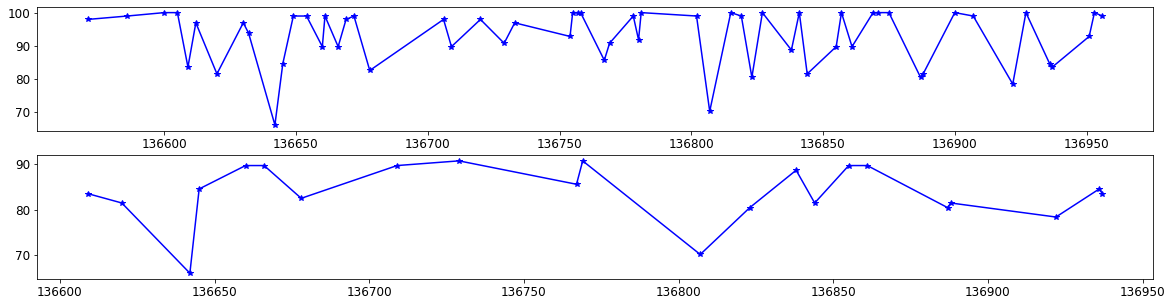

In [644]:
fig5 = plt.figure(figsize = (20,5))
ax1 = fig5.add_subplot(2,1,1)
ax1.plot(db_Belgorod['flight_id'], db_Belgorod['aircraft_fill_percentage'], color = 'blue', linestyle = '-', marker='*')
ax2 = fig5.add_subplot(2,1,2)
ax2.plot(less_valuable_flights_Belgorod['flight_id'], less_valuable_flights_Belgorod['aircraft_fill_percentage'], color = 'blue', linestyle = '-', marker='*')

Относительно рейсов в Москву, в Белгород отправляют более заполненные самолеты, поэтму большая часть прибыли колеблится 
в одном диапазоне. По всем показателям можно исключить рейсы: 136642,
136807, 136844, 136922	